In [ ]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install diffprivlib
%pip install seaborn

import math
import sklearn
import warnings
import numpy as np
import pandas as pd
import diffprivlib as dp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from diffprivlib.models import LogisticRegression as diff_LogisticRegression
from diffprivlib.tools.utils import mean, var
from diffprivlib.models.k_means import KMeans as diff_KMeans
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

warnings.filterwarnings("ignore")

# set a random seed
random_seed = "57643"

In [2]:
# datafram df to reference raw dataset 
df = pd.read_csv("pcos_dataset.csv", sep=",", engine='python')
df

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0
...,...,...,...,...,...,...
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0


In [3]:
# goal: using logistic regression classifer by sklearn to classify PCOS_Diagonis in pcos_dataset

# Encode dataset 
label_encoder = LabelEncoder() 
#Encode labels in column species 
df['Age']= label_encoder.fit_transform(df['Age']) 
df['BMI']= label_encoder.fit_transform(df['BMI']) 
df['Menstrual_Irregularity']= label_encoder.fit_transform(df['Menstrual_Irregularity']) 
df['Testosterone_Level(ng/dL)']= label_encoder.fit_transform(df['Testosterone_Level(ng/dL)']) 
df['Antral_Follicle_Count']= label_encoder.fit_transform(df['Antral_Follicle_Count']) 

df

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,6,166,1,39,15,0
1,19,83,0,266,20,0
2,14,55,0,525,23,0
3,10,107,0,309,21,0
4,7,40,1,285,3,0
...,...,...,...,...,...,...
995,16,3,1,544,18,0
996,27,108,1,62,2,0
997,19,102,0,91,23,0
998,23,92,0,543,4,0


In [4]:
# randomly select 50% data using random_seed for target set, rest in test 
D_target = df.sample(frac=0.5, random_state=int(random_seed))
D_test = df[~df.isin(D_target).all(axis=1)]

In [5]:
target_variable = "PCOS_Diagnosis"
# columns that are not PCOS_Diagnosis will be feature/predictor columns 
feature_cols = [key for key in df.keys() if key != "PCOS_Diagnosis"]

In [6]:
# target model training 
M_target = LogisticRegression(random_state=int(random_seed))
M_target.fit(D_target[feature_cols], D_target[target_variable])

average_accuracy = np.average(cross_validate(M_target, D_target[feature_cols], D_target[target_variable], cv=5, scoring='accuracy')['test_score'])
average_precision = np.average(cross_validate(M_target, D_target[feature_cols], D_target[target_variable], cv=5, scoring='precision')['test_score'])
average_recall = np.average(cross_validate(M_target, D_target[feature_cols], D_target[target_variable], cv=5, scoring='recall')['test_score'])

print(f"Average accuracy: {average_accuracy}")
print(f"Average precision: {average_precision}")
print(f"Average recall: {average_recall}")


Average accuracy: 0.914
Average precision: 0.8019131161236425
Average recall: 0.7389473684210527


Confusion Matrix:
 [[384  13]
 [ 31  72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       397
           1       0.85      0.70      0.77       103

    accuracy                           0.91       500
   macro avg       0.89      0.83      0.86       500
weighted avg       0.91      0.91      0.91       500



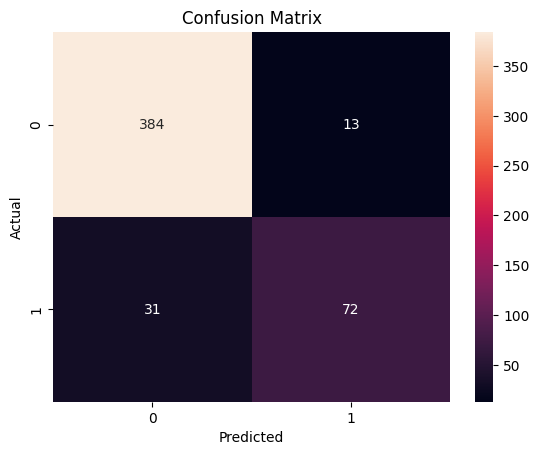

In [ ]:
# 1. Query the target model using the test dataset
PCOS_diagonsis_predicted = pd.DataFrame(M_target.predict(D_test[feature_cols]))

# 2. Get now compare with the ground truth and grab accuracy, precision, and revall
PCOS_diagonis_ground_truth = D_test[['PCOS_Diagnosis']] 
cm = confusion_matrix(PCOS_diagonis_ground_truth, PCOS_diagonsis_predicted)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(PCOS_diagonis_ground_truth, PCOS_diagonsis_predicted))

# 3. Let's visualize some results
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
# printing the predicted and ground truth 
print(PCOS_diagonsis_predicted)
print(PCOS_diagonis_ground_truth)

     0
0    1
1    0
2    0
3    0
4    0
..  ..
495  0
496  0
497  0
498  0
499  0

[500 rows x 1 columns]
     PCOS_Diagnosis
0                 0
1                 0
2                 0
7                 0
9                 0
..              ...
992               0
993               0
996               0
997               0
998               0

[500 rows x 1 columns]


Confusion Matrix:
 [[384  13]
 [ 31  72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       397
           1       0.85      0.70      0.77       103

    accuracy                           0.91       500
   macro avg       0.89      0.83      0.86       500
weighted avg       0.91      0.91      0.91       500



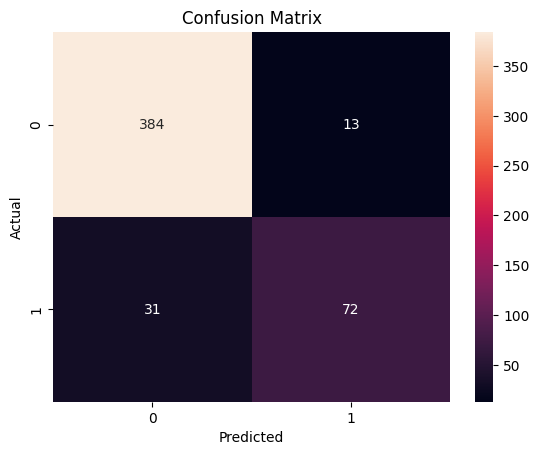

In [9]:
# Differential privacy 

# Train Target model
M_target = diff_LogisticRegression(epsilon=15).fit(D_target[feature_cols], D_target[target_variable])

# 1. Query the target model using the test dataset
PCOS_diagonsis_predicted_predicted = pd.DataFrame(M_target.predict(D_test[feature_cols]))
PCOS_diagonsis_predicted

# 2. Get now compare with the ground truth and grab accuracy, precision, and revall
PCOS_diagonis_ground_truth = D_test[['PCOS_Diagnosis']] 
cm = confusion_matrix(PCOS_diagonis_ground_truth, PCOS_diagonsis_predicted)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(PCOS_diagonis_ground_truth, PCOS_diagonsis_predicted))

# 3. Let's visualize some results
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# 3. Test results
accuracy = accuracy_score(PCOS_diagonis_ground_truth, PCOS_diagonsis_predicted)
precision = precision_score(PCOS_diagonis_ground_truth, PCOS_diagonsis_predicted)
recall = recall_score(PCOS_diagonis_ground_truth, PCOS_diagonsis_predicted)

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")

Accuracy: 0.912
precision: 0.8470588235294118
recall: 0.6990291262135923
